In [1]:
# test_cartpole.py
import cartpole
import random
import time


def run_cartpole_c(max_total_steps: int = 10_000):
    env = cartpole.CartPoleEnv()
    state = env.reset()
    # print("Initial State:", state)

    done = False
    time_steps = 0
    total_steps = 0
    max_time_steps = 500

    start_time = time.time()

    while total_steps < max_total_steps:

        while not done and time_steps < max_time_steps:
            # Agent selects a random action
            action = random.randint(0, 1)
            state, reward, done = env.step(action)
            # print(f"Time Step: {time_steps}, Action: {action}, State: {state}, Reward: {reward}, Done: {done}")
            time_steps += 1
            total_steps += 1

            if total_steps >= max_total_steps:
                break

        if done:
            time_steps = 0
            done = False
            # print(f"Episode terminated after {time_steps} time steps.")
        # else:
            # print(f"Episode reached max time steps ({max_time_steps}).")
        env.reset()

    sps = total_steps / (time.time() - start_time)
    print(f"CartPole C:\nTotal Steps: {total_steps}, Steps per Second: {sps:.2f}")
    return sps

In [2]:
c_sps = run_cartpole_c(10_000)

CartPole C:
Total Steps: 10000, Steps per Second: 1054719.74


In [3]:
import gymnasium as gym

def run_cartpole_py(max_total_steps: int = 10_000):
    env = gym.make("CartPole-v1")
    state, info = env.reset()
    # print("Initial State:", state)

    done = False
    time_steps = 0
    total_steps = 0
    max_time_steps = 500

    start_time = time.time()

    while total_steps < max_total_steps:

        while not done and time_steps < max_time_steps:
            # Agent selects a random action
            action = env.action_space.sample()
            _, _, done, truncated, _ = env.step(action)
            time_steps += 1
            total_steps += 1

            if total_steps >= max_total_steps:
                break

        if done or truncated:
            time_steps = 0
            done = False

        env.reset()

    sps = total_steps / (time.time() - start_time)
    print(f"CartPole Python:\nTotal Steps: {total_steps}, Steps per Second: {sps:.2f}")
    return sps


In [4]:
py_sps = run_cartpole_py(10_000)

CartPole Python:
Total Steps: 10000, Steps per Second: 144269.01


In [136]:
c_sps = run_cartpole_c(10_000_000)
py_sps = run_cartpole_py(10_000_000)

print(f"Speedup: {c_sps / py_sps:.2f}X")


CartPole C:
Total Steps: 10000000, Steps per Second: 2247189.54
CartPole Python:
Total Steps: 10000000, Steps per Second: 182708.32
Speedup: 12.30X


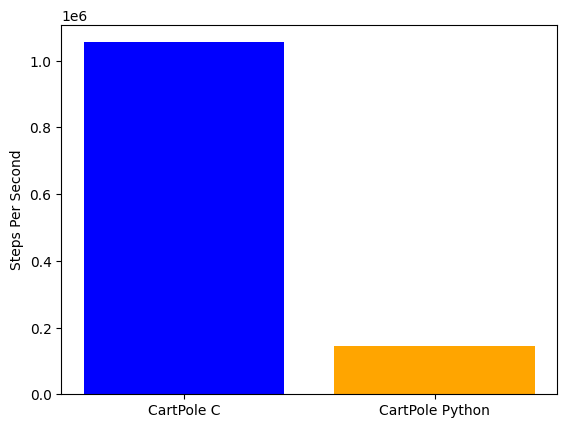

In [6]:
# Plot a histogram of the results
import matplotlib.pyplot as plt

plt.bar(["CartPole C", "CartPole Python"], [c_sps, py_sps], color=["blue", "orange"])
plt.ylabel("Steps Per Second")
plt.show()